In [1]:
# Required packages: datasets pandas matplotlib seaborn nltk wordcloud



In [2]:
# Load dataset from https://huggingface.co/datasets/armanc/pubmed-rct20k
from datasets import load_dataset
from typing import Iterator, Optional
import re
from tqdm.auto import tqdm
import time

def preprocess_string(text: str) -> str:
    """Preprocessing function for text cleaning"""
    # Remove special characters and normalize whitespace
    text = re.sub(r'@\s+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

class PubMedCorpus:
    """Corpus iterator for PubMed RCT dataset"""
    
    def __init__(self, splits: list[str] = None, max_examples: Optional[int] = None):
        if splits is None:
            splits = ['train', 'validation', 'test']
        
        print(f"Loading PubMed dataset (splits: {', '.join(splits)})...")
        datasets = []
        with tqdm(total=len(splits), desc="Loading dataset splits", unit="split") as pbar:
            for split in splits:
                ds = load_dataset("armanc/pubmed-rct20k", split=split, streaming=True)
                datasets.append(ds)
                pbar.update(1)
            time.sleep(0.5)
        
        from itertools import chain
        self.datasets = datasets
        self.max_examples = max_examples
        print(f"Dataset loaded. Splits: {', '.join(splits)}, Max examples: {max_examples or 'unlimited'}")

    def __iter__(self) -> Iterator[str]:
        from itertools import chain
        count = 0
        for dataset in self.datasets:
            for example in dataset:
                if self.max_examples and count >= self.max_examples:
                    return
                text = example.get('text', '')
                yield preprocess_string(text)
                count += 1
    
    def get_labels_and_text(self) -> Iterator[tuple[int, str]]:
        """Iterator that yields (label, text) pairs"""
        count = 0
        for dataset in self.datasets:
            for example in dataset:
                if self.max_examples and count >= self.max_examples:
                    return
                label = example.get('label')
                text = example.get('text', '')
                if label is not None:
                    yield label, preprocess_string(text)
                    count += 1
    
    def get_raw_examples(self) -> Iterator[dict]:
        """Iterator that yields raw dataset examples for analysis"""
        count = 0
        for dataset in self.datasets:
            for example in dataset:
                if self.max_examples and count >= self.max_examples:
                    return
                yield example
                count += 1

# Create the corpus iterator with limit for demonstration
corpus = PubMedCorpus(max_examples=5)

print("\nProcessing first few documents...")
with tqdm(total=3, desc="Processing documents", unit="doc") as pbar:
    for i, doc in enumerate(corpus):
        if i >= 3:
            break
        print(f"Document {i+1}: {doc[:100]}...")
        pbar.update(1)
        time.sleep(0.2)
    

print("\nProcessing samples with labels...")
labeled_corpus = PubMedCorpus(max_examples=3)
with tqdm(total=3, desc="Processing labeled samples", unit="sample") as pbar:
    for label, text in labeled_corpus.get_labels_and_text():
        print(f"Label {label}: {text[:80]}...")
        pbar.update(1)
        time.sleep(0.2)




Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/646 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json: 0.00B [00:00, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: 5

Processing first few documents...


Processing documents:   0%|          | 0/3 [00:00<?, ?doc/s]

Document 1: to investigate the efficacy of weeks of daily low-dose oral prednisolone in improving pain , mobilit...
Document 2: a total of patients with primary knee oa were randomized @:; received mg/day of prednisolone and rec...
Document 3: outcome measures included pain reduction and improvement in function scores and systemic inflammatio...

Processing samples with labels...
Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: 3


Processing labeled samples:   0%|          | 0/3 [00:00<?, ?sample/s]

Label objective: to investigate the efficacy of weeks of daily low-dose oral prednisolone in impr...
Label methods: a total of patients with primary knee oa were randomized @:; received mg/day of ...
Label methods: outcome measures included pain reduction and improvement in function scores and ...


In [3]:
# Show first 5 examples as a pandas DataFrame
import pandas as pd

print("\nCreating DataFrame with sample data...")
corpus = PubMedCorpus(max_examples=5)
data = []

with tqdm(total=5, desc="Collecting data for DataFrame", unit="example") as pbar:
    for label, text in corpus.get_labels_and_text():
        data.append({
            'label': label,
            'text_preview': text[:200] + '...' if len(text) > 200 else text,
            'text_length': len(text)
        })
        pbar.update(1)
        time.sleep(0.1)

print("\nProcessing DataFrame...")
with tqdm(total=1, desc="DataFrame processing", unit="step") as pbar:
    pbar.set_description("Creating DataFrame")
    df = pd.DataFrame(data)
    pbar.update(1)
    time.sleep(0.2)

print("DataFrame creation completed!")
print("\nSample data:")
df




Creating DataFrame with sample data...
Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: 5



Processing DataFrame...


DataFrame processing:   0%|          | 0/1 [00:00<?, ?step/s]

DataFrame creation completed!

Sample data:


,label,text_preview,text_length
0,objective,to investigate the efficacy of weeks of daily ...,277
1,methods,a total of patients with primary knee oa were ...,125
2,methods,outcome measures included pain reduction and i...,111
3,methods,pain was assessed using the visual analog pain...,63
4,methods,secondary outcome measures included the wester...,209


In [4]:
# Dataset structure and column information
corpus = PubMedCorpus(max_examples=1)
first_example = next(corpus.get_raw_examples())

print("Dataset columns:", list(first_example.keys()))
print("\nColumn details:")
for key, value in first_example.items():
    if isinstance(value, (list, dict)):
        print(f"  {key}: {type(value).__name__} (length: {len(value) if hasattr(value, '__len__') else 'N/A'})")
    else:
        print(f"  {key}: {type(value).__name__} = {value}")



Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: 1
Dataset columns: ['abstract_id', 'label', 'text', 'sentence_id']

Column details:
  abstract_id: str = 24293578
  label: str = objective
  text: str = To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
  sentence_id: int = 0


In [5]:
# Analyze unique labels in the dataset
from collections import Counter

corpus = PubMedCorpus()
label_counter = Counter()
labels_seen = set()

print("Analyzing labels from the full dataset...")
for example in corpus.get_raw_examples():
    if 'label' in example:
        val = example['label']
        if isinstance(val, list):
            labels_seen.update(val)
            label_counter.update(val)
        else:
            labels_seen.add(val)
            label_counter[val] += 1

print(f"Unique labels found: {sorted(labels_seen)}")
print(f"Label distribution: {dict(label_counter.most_common())}")

print("\nLabel statistics:")
for label in sorted(labels_seen):
    count = label_counter.get(label, 0)
    print(f"  {label}: {count:,} examples")



Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Analyzing labels from the full dataset...
Unique labels found: ['background', 'conclusions', 'methods', 'objective', 'results']
Label distribution: {'methods': 79113, 'results': 77507, 'conclusions': 36321, 'background': 24404, 'objective': 18547}

Label statistics:
  background: 24,404 examples
  conclusions: 36,321 examples
  methods: 79,113 examples
  objective: 18,547 examples
  results: 77,507 examples


Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Analyzing class balance from the full dataset...


/tmp/ipython-input-445464297.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balance_df, x='label', y='count', ax=ax1, palette='viridis')


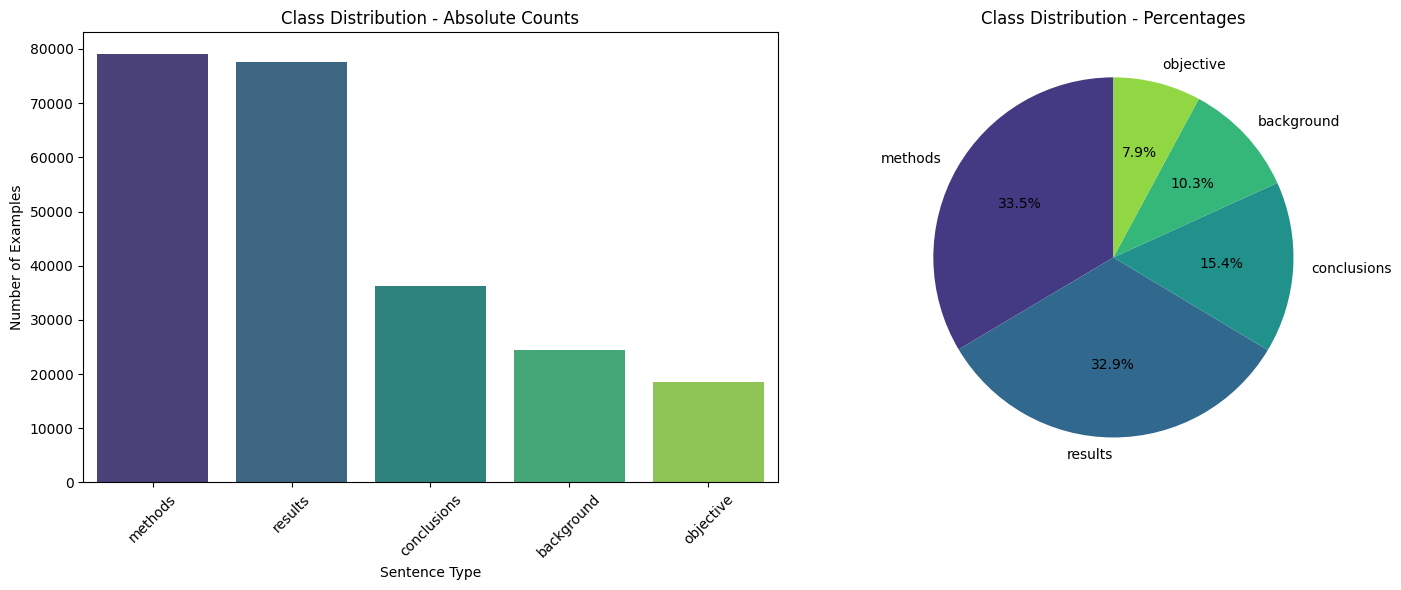


Class Balance Statistics:
      label  count  percentage
    methods  79113   33.537805
    results  77507   32.856985
conclusions  36321   15.397300
 background  24404   10.345412
  objective  18547    7.862496


In [6]:
# Class Balance Analysis
import matplotlib.pyplot as plt
import seaborn as sns

corpus = PubMedCorpus()
label_counter = Counter()

print("Analyzing class balance from the full dataset...")
for example in corpus.get_raw_examples():
    if 'label' in example:
        label_counter[example['label']] += 1

# Create DataFrame for visualization
balance_data = []
for label, count in label_counter.items():
    balance_data.append({
        'label': label,
        'count': count,
        'percentage': count / sum(label_counter.values()) * 100
    })

balance_df = pd.DataFrame(balance_data)
balance_df = balance_df.sort_values('count', ascending=False)

# Visualize class balance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot with counts
sns.barplot(data=balance_df, x='label', y='count', ax=ax1, palette='viridis')
ax1.set_title('Class Distribution - Absolute Counts')
ax1.set_xlabel('Sentence Type')
ax1.set_ylabel('Number of Examples')
ax1.tick_params(axis='x', rotation=45)

# Pie chart with percentages
colors = sns.color_palette('viridis', len(balance_df))
ax2.pie(balance_df['count'], labels=balance_df['label'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Class Distribution - Percentages')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nClass Balance Statistics:")
print(balance_df.to_string(index=False))



In [7]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Discovering unique labels...
Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Analyzing stop words per class from the full dataset...


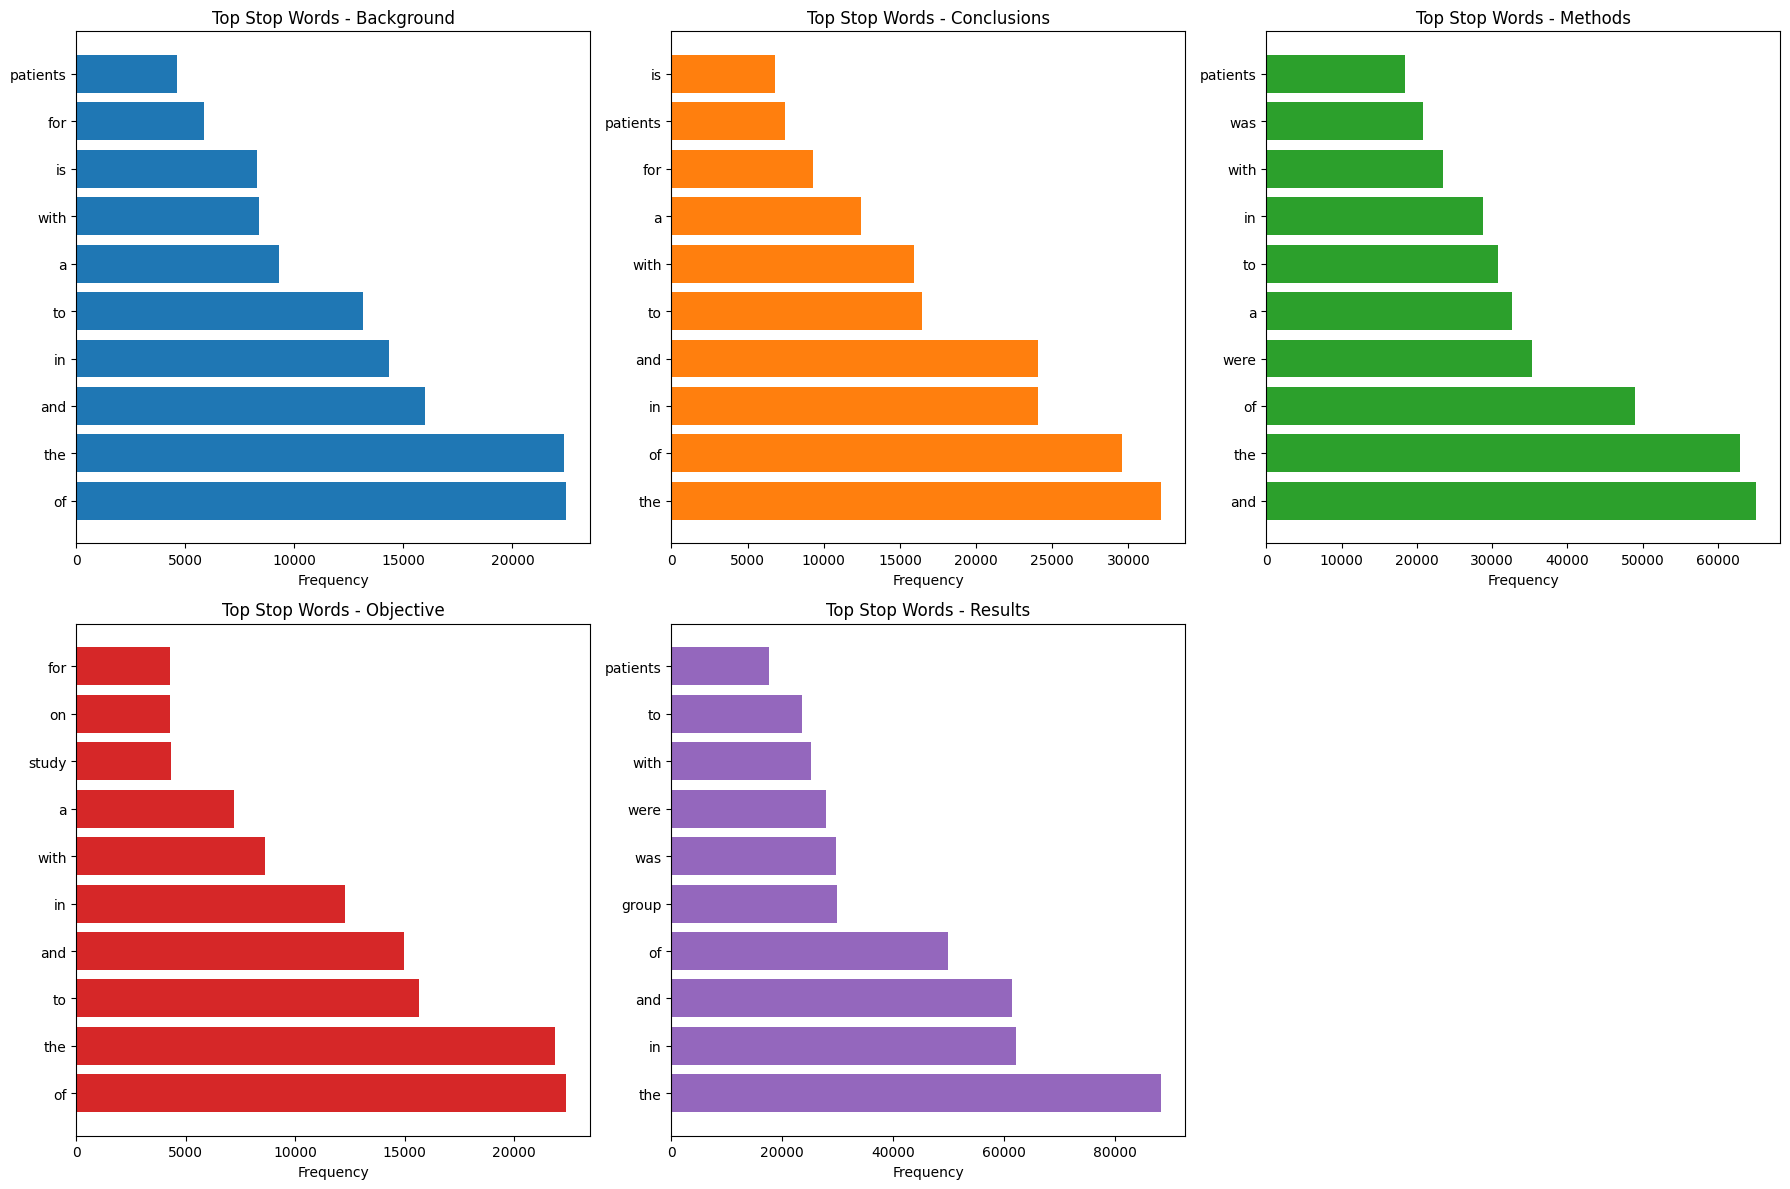

In [8]:
# Stop Words Analysis per Class
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

english_stopwords = set(stopwords.words('english'))
medical_stopwords = {'patients', 'study', 'treatment', 'weeks', 'days', 'results', 
                     'clinical', 'trial', 'group', 'compared', 'significant',
                     'analysis', 'data', 'methods', 'conclusion'}
all_stopwords = english_stopwords.union(medical_stopwords)

corpus = PubMedCorpus()
print("Discovering unique labels...")
unique_labels = set()
for example in corpus.get_raw_examples():
    if 'label' in example:
        unique_labels.add(example['label'])
    if len(unique_labels) >= 10:
        break

class_texts = {label: [] for label in unique_labels}
class_stopwords = {label: Counter() for label in unique_labels}

corpus = PubMedCorpus()  # Recreate corpus for full iteration
print("Analyzing stop words per class from the full dataset...")
for example in corpus.get_raw_examples():
    if 'label' in example:
        label = example['label']
        text = preprocess_string(example.get('text', ''))
        class_texts[label].append(text)
        
        # Tokenize and count stop words
        tokens = word_tokenize(text)
        stop_words_in_text = [word for word in tokens if word.lower() in all_stopwords]
        class_stopwords[label].update(stop_words_in_text)

# Visualize top stop words per class
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, label in enumerate(sorted(unique_labels)):
    if i < len(axes):
        top_stopwords = class_stopwords[label].most_common(10)
        if top_stopwords:
            words, counts = zip(*top_stopwords)
            
            axes[i].barh(range(len(words)), counts, color=f'C{i}')
            axes[i].set_yticks(range(len(words)))
            axes[i].set_yticklabels(words)
            axes[i].set_title(f'Top Stop Words - {label.title()}')
            axes[i].set_xlabel('Frequency')

# Remove empty subplots
for i in range(len(unique_labels), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Generating word clouds from the full dataset...


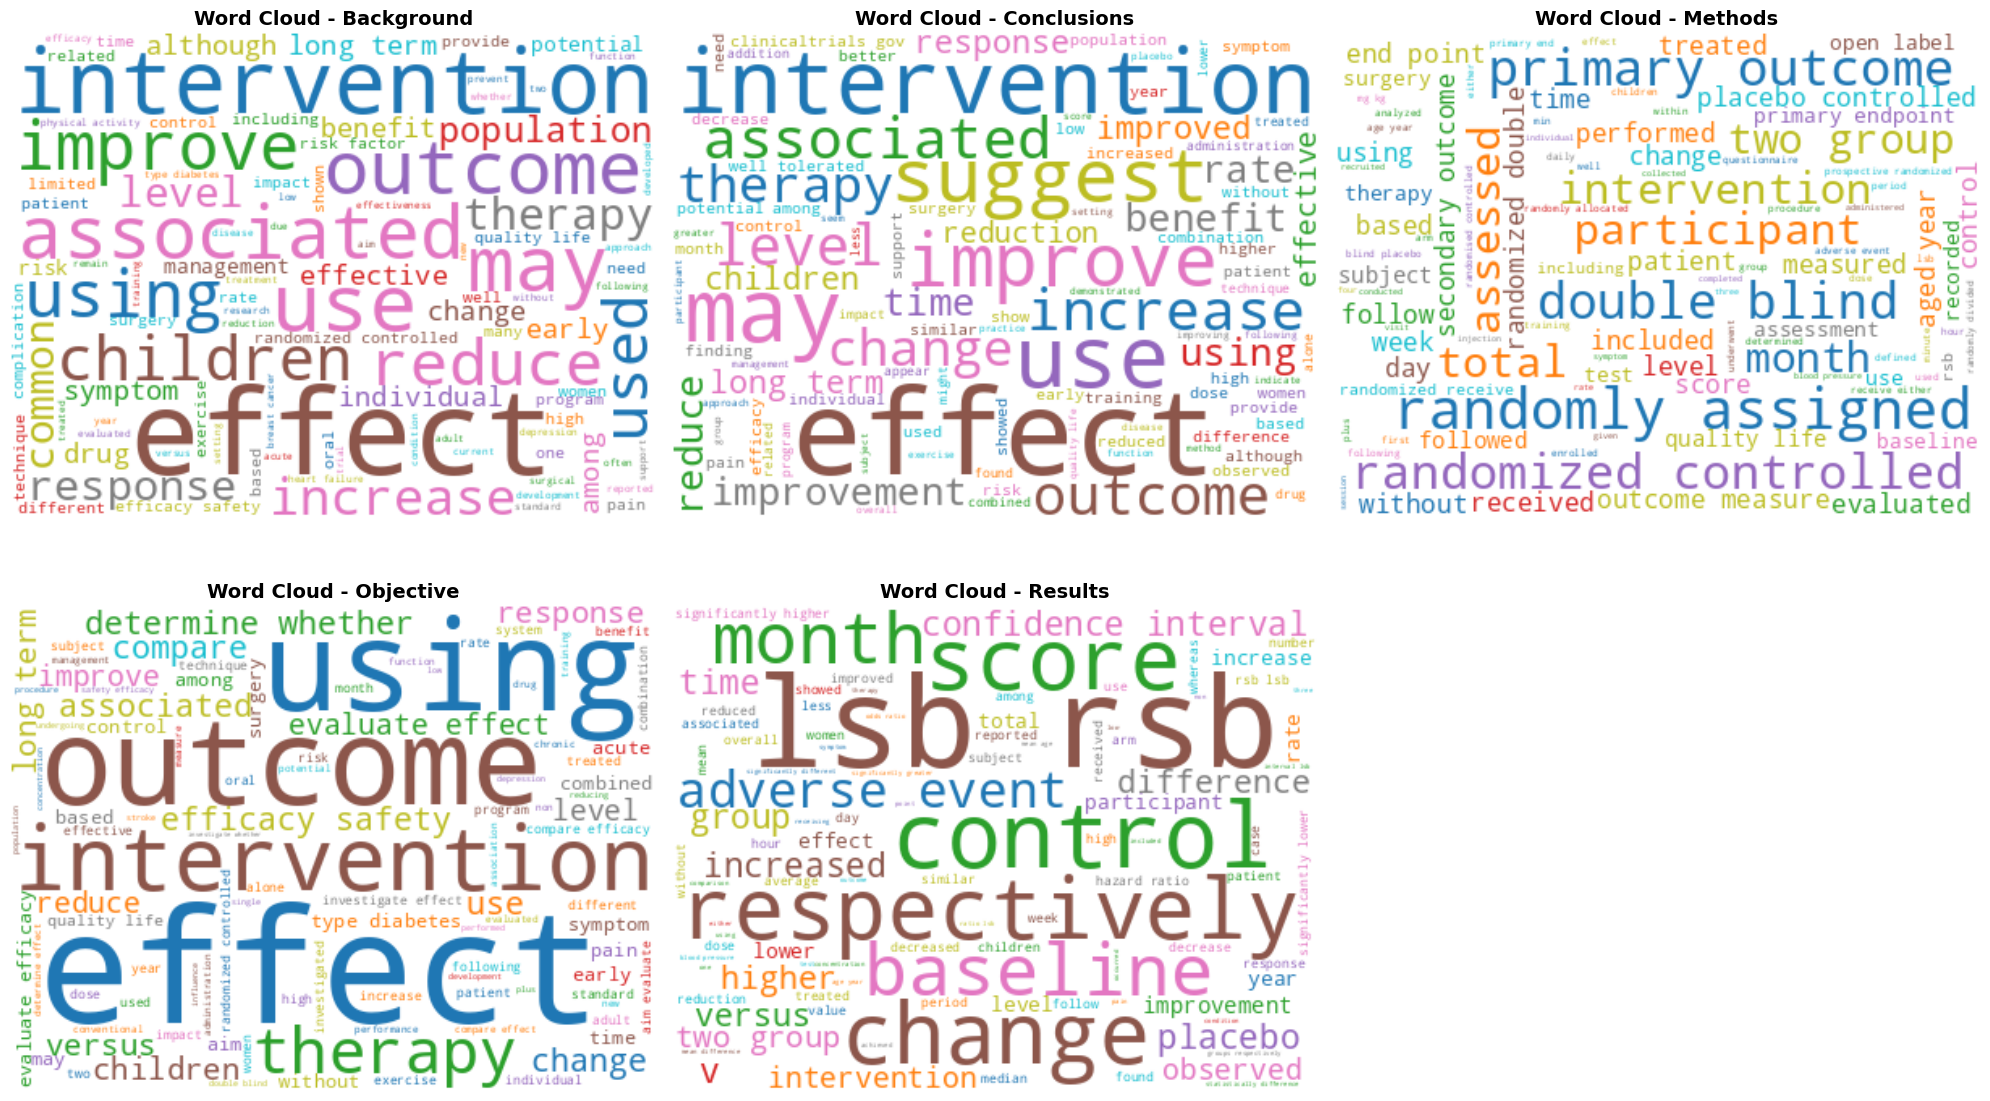

In [9]:
# Word Cloud Generation
from wordcloud import WordCloud
import numpy as np

corpus = PubMedCorpus()
class_texts = {label: [] for label in unique_labels}

print("Generating word clouds from the full dataset...")
for example in corpus.get_raw_examples():
    if 'label' in example:
        label = example['label']
        text = example.get('text', '')
        # Remove stop words for better visualization
        tokens = word_tokenize(preprocess_string(text))
        filtered_text = ' '.join([word for word in tokens if word.lower() not in all_stopwords and len(word) > 2])
        class_texts[label].append(filtered_text)

# Create word clouds
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, label in enumerate(sorted(unique_labels)):
    if i < len(axes) and class_texts[label]:
        combined_text = ' '.join(class_texts[label])
        
        if combined_text.strip():
            wordcloud = WordCloud(
                width=400, 
                height=300,
                background_color='white',
                colormap=f'tab10',
                max_words=100,
                relative_scaling=0.5,
                random_state=42
            ).generate(combined_text)
            
            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'Word Cloud - {label.title()}', fontsize=14, fontweight='bold')
            axes[i].axis('off')

# Remove empty subplots
for i in range(len(unique_labels), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Analyzing text lengths from the full dataset...


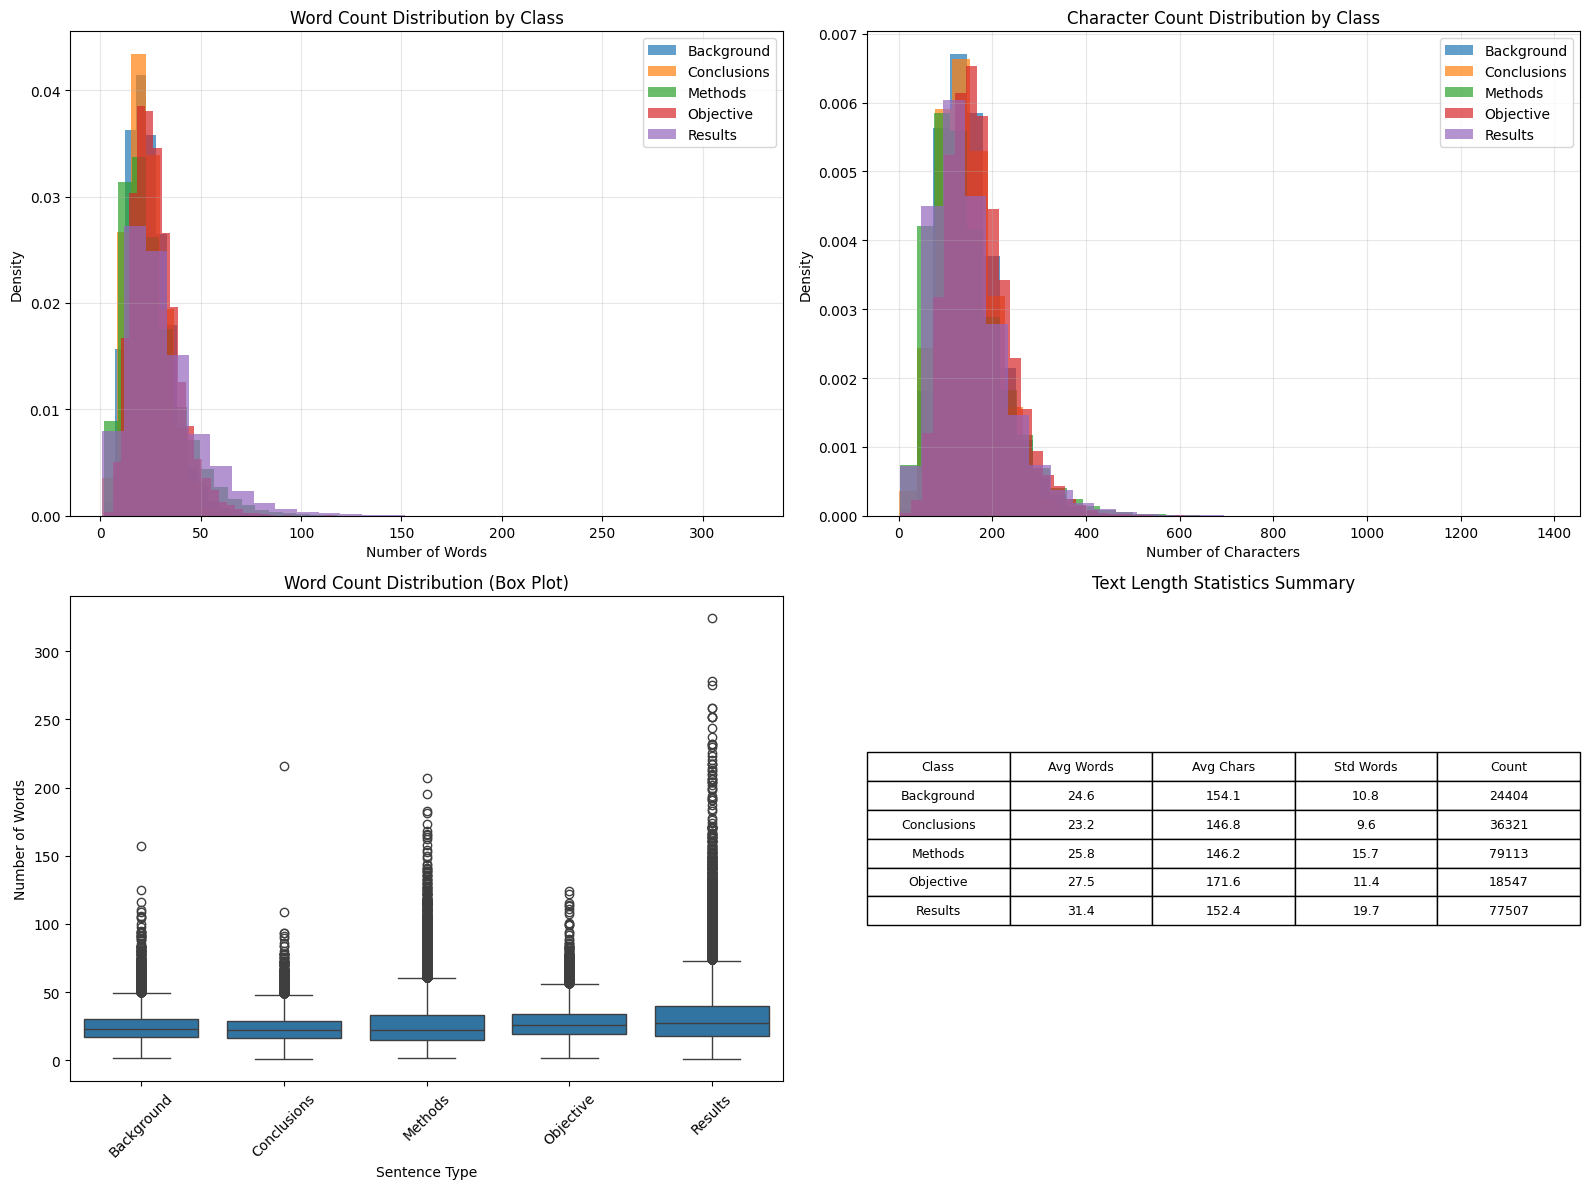


Text Length Statistics:

Background:
  Word count - Mean: 24.6, Std: 10.8
  Char count - Mean: 154.1, Std: 66.0
  Sample size: 24404

Conclusions:
  Word count - Mean: 23.2, Std: 9.6
  Char count - Mean: 146.8, Std: 61.5
  Sample size: 36321

Methods:
  Word count - Mean: 25.8, Std: 15.7
  Char count - Mean: 146.2, Std: 82.1
  Sample size: 79113

Objective:
  Word count - Mean: 27.5, Std: 11.4
  Char count - Mean: 171.6, Std: 67.7
  Sample size: 18547

Results:
  Word count - Mean: 31.4, Std: 19.7
  Char count - Mean: 152.4, Std: 81.1
  Sample size: 77507


In [10]:
# Text Length Analysis
corpus = PubMedCorpus()
text_lengths = {label: [] for label in unique_labels}

print("Analyzing text lengths from the full dataset...")
for example in corpus.get_raw_examples():
    if 'label' in example:
        label = example['label']
        text = example.get('text', '')
        word_count = len(word_tokenize(text))
        char_count = len(text)
        text_lengths[label].append({'words': word_count, 'chars': char_count})

# Create comprehensive text length analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Word count distribution by class
ax1 = axes[0, 0]
for label in sorted(unique_labels):
    if text_lengths[label]:
        word_counts = [item['words'] for item in text_lengths[label]]
        ax1.hist(word_counts, bins=30, alpha=0.7, label=f'{label.title()}', density=True)

ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Density')
ax1.set_title('Word Count Distribution by Class')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Character count distribution by class
ax2 = axes[0, 1]
for label in sorted(unique_labels):
    if text_lengths[label]:
        char_counts = [item['chars'] for item in text_lengths[label]]
        ax2.hist(char_counts, bins=30, alpha=0.7, label=f'{label.title()}', density=True)

ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Density')
ax2.set_title('Character Count Distribution by Class')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Box plot for word counts
ax3 = axes[1, 0]
word_data = []
labels_for_box = []
for label in sorted(unique_labels):
    if text_lengths[label]:
        word_counts = [item['words'] for item in text_lengths[label]]
        word_data.extend(word_counts)
        labels_for_box.extend([label.title()] * len(word_counts))

box_df = pd.DataFrame({'words': word_data, 'class': labels_for_box})
sns.boxplot(data=box_df, x='class', y='words', ax=ax3)
ax3.set_title('Word Count Distribution (Box Plot)')
ax3.set_xlabel('Sentence Type')
ax3.set_ylabel('Number of Words')
ax3.tick_params(axis='x', rotation=45)

# Summary statistics
ax4 = axes[1, 1]
summary_stats = []
for label in sorted(unique_labels):
    if text_lengths[label]:
        word_counts = [item['words'] for item in text_lengths[label]]
        char_counts = [item['chars'] for item in text_lengths[label]]
        summary_stats.append({
            'Class': label.title(),
            'Avg Words': np.mean(word_counts),
            'Avg Chars': np.mean(char_counts),
            'Std Words': np.std(word_counts),
            'Count': len(word_counts)
        })

summary_df = pd.DataFrame(summary_stats)
ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=summary_df.round(1).values, 
                  colLabels=summary_df.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
ax4.set_title('Text Length Statistics Summary')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nText Length Statistics:")
for label in sorted(unique_labels):
    if text_lengths[label]:
        word_counts = [item['words'] for item in text_lengths[label]]
        char_counts = [item['chars'] for item in text_lengths[label]]
        print(f"\n{label.title()}:")
        print(f"  Word count - Mean: {np.mean(word_counts):.1f}, Std: {np.std(word_counts):.1f}")
        print(f"  Char count - Mean: {np.mean(char_counts):.1f}, Std: {np.std(char_counts):.1f}")
        print(f"  Sample size: {len(word_counts)}")



In [11]:
# Visualize a complete abstract with color-coded sentences
from IPython.display import HTML
import matplotlib.colors as mcolors

corpus = PubMedCorpus()

# Collect all sentences for the first abstract (abstract_id index 0)
print("Loading sentences from the first abstract...")
abstract_sentences = []
first_abstract_id = None

for example in corpus.get_raw_examples():
    if first_abstract_id is None:
        first_abstract_id = example.get('abstract_id')
    
    if example.get('abstract_id') == first_abstract_id:
        abstract_sentences.append({
            'sentence_id': example.get('sentence_id'),
            'label': example.get('label'),
            'text': example.get('text', '')
        })
    elif len(abstract_sentences) > 0:
        break


abstract_sentences.sort(key=lambda x: x['sentence_id'])

print(f"\nAbstract ID: {first_abstract_id}")
print(f"Number of sentences: {len(abstract_sentences)}\n")


label_colors = {
    'background': '#FFE6E6',
    'objective': '#E6F3FF',
    'methods': '#E6FFE6',
    'results': '#FFF9E6',
    'conclusions': '#F3E6FF'
}

html_parts = [f"<div style='font-family: Arial; line-height: 1.8; padding: 20px;'>"]
html_parts.append(f"<h3>Abstract ID: {first_abstract_id}</h3>")

html_parts.append("<div style='margin-bottom: 15px;'><strong>Legend:</strong> ")
for label, color in sorted(label_colors.items()):
    html_parts.append(f"<span style='background-color: {color}; padding: 3px 8px; margin: 0 5px; border-radius: 3px;'>{label.title()}</span>")
html_parts.append("</div>")

html_parts.append("<div style='text-align: justify; margin-bottom: 20px;'>")
full_text_parts = []
for sent in abstract_sentences:
    label = sent['label']
    text = sent['text']
    color = label_colors.get(label, '#FFFFFF')
    
    html_parts.append(
        f"<span style='background-color: {color}; padding: 2px 4px; margin: 2px; "
        f"border-radius: 3px; display: inline;'>"
        f"<strong>[{label.upper()}]</strong> {text} </span>"
    )
    full_text_parts.append(f"[{label.upper()}] {text}")

html_parts.append("</div></div>")

display(HTML(''.join(html_parts)))
print("\n" + "="*80)
print("PLAIN TEXT VERSION:")
print("="*80)
for sent in abstract_sentences:
    print(f"\n[{sent['label'].upper()}] {sent['text']}")



Loading PubMed dataset (splits: train, validation, test)...


Loading dataset splits:   0%|          | 0/3 [00:00<?, ?split/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded. Splits: train, validation, test, Max examples: unlimited
Loading sentences from the first abstract...

Abstract ID: 24293578
Number of sentences: 12




PLAIN TEXT VERSION:

[OBJECTIVE] To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .

[METHODS] A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .

[METHODS] Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .

[METHODS] Pain was assessed using the visual analog pain scale ( @-@ mm ) .

[METHODS] Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .

[METHODS] Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity 

In [12]:
# Model Training with MLflow
# Train a SciBERT classifier for sentence-level classification


In [13]:
import subprocess
import sys

# Install MLflow and other required packages

packages = ['mlflow', 'transformers', 'torch', 'scikit-learn', 'accelerate']

for package in packages:
    try:
        __import__(package)
        print(f"Package {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '-q'])
        print(f"Package {package} installed successfully")

print("\nAll dependencies installed!")


Installing mlflow...
Package mlflow installed successfully
Package transformers already installed
Package torch already installed
Installing scikit-learn...
Package scikit-learn installed successfully
Package accelerate already installed

All dependencies installed!


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification,
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)
from sklearn.metrics import f1_score, precision_recall_fscore_support, classification_report, confusion_matrix
import mlflow
import mlflow.pytorch
from datetime import datetime
import os

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")



Using device: cuda
GPU: NVIDIA H100 80GB HBM3


In [15]:
# Prepare dataset for training


In [16]:
print("Loading PubMed RCT dataset for training...")
from datasets import load_dataset
from collections import defaultdict
import random

# Load the full dataset
train_dataset = load_dataset("armanc/pubmed-rct20k", split="train")
val_dataset = load_dataset("armanc/pubmed-rct20k", split="validation")
test_dataset = load_dataset("armanc/pubmed-rct20k", split="test")

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

# Get label mapping
unique_labels = sorted(set(train_dataset['label']))
label2id = {label: idx for idx, label in enumerate(unique_labels)}
id2label = {idx: label for label, idx in label2id.items()}
num_labels = len(unique_labels)

print(f"\nLabel mapping:")
for label, idx in label2id.items():
    print(f"  {label}: {idx}")



Loading PubMed RCT dataset for training...


Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/40.7M [00:00<?, ?B/s]

dev.jsonl: 0.00B [00:00, ?B/s]

test.jsonl: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/176642 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29672 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/29578 [00:00<?, ? examples/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


Train size: 176642
Validation size: 29672
Test size: 29578

Label mapping:
  background: 0
  conclusions: 1
  methods: 2
  objective: 3
  results: 4


In [34]:
# Smart downsampling by class within each abstract

def downsample_dataset_by_class(dataset, max_sentences_per_class=3, balance_to_min_class=False, seed=42):
    """
    Smart downsampling strategy that addresses class imbalance.
    
    For each abstract, this function samples a limited number of sentences
    per class. Since abstracts often have multiple sentences of the same class,
    this prevents over-representation of common patterns and reduces class imbalance.
    
    Strategy:
    1. Group sentences by (abstract_id, class_label)
    2. For each group, randomly sample up to max_sentences_per_class
    3. This ensures balanced representation across classes within abstracts
    4. If balance_to_min_class=True, all classes will have the same number of samples
       as the least represented class
    
    Args:
        dataset: HuggingFace dataset to downsample
        max_sentences_per_class: Maximum sentences to keep per class within each abstract
                                (ignored if balance_to_min_class=True)
        balance_to_min_class: If True, downsample all classes to match the smallest class size
        seed: Random seed for reproducibility
    
    Returns:
        List of selected dataset indices
    """
    random.seed(seed)
    
    abstract_class_sentences = defaultdict(list)
    class_all_indices = defaultdict(list)
    
    for idx, example in enumerate(dataset):
        abstract_id = example['abstract_id']
        label = example['label']
        sentence_id = example.get('sentence_id', idx)
        
        key = (abstract_id, label)
        sentence_info = {
            'index': idx,
            'sentence_id': sentence_id,
            'text': example.get('text', '')
        }
        abstract_class_sentences[key].append(sentence_info)
        class_all_indices[label].append(sentence_info)
    
    selected_indices = []
    sampling_stats = defaultdict(lambda: {'total': 0, 'sampled': 0})
    
    if balance_to_min_class:
        # Find minimum class size
        min_class_size = min(len(indices) for indices in class_all_indices.values())
        print(f"\nBalancing to minimum class size: {min_class_size}")
        
        # Sample exactly min_class_size examples from each class
        for label, all_sentences in class_all_indices.items():
            sampling_stats[label]['total'] = len(all_sentences)
            
            if len(all_sentences) <= min_class_size:
                selected = all_sentences
            else:
                selected = random.sample(all_sentences, min_class_size)
            
            selected_indices.extend([s['index'] for s in selected])
            sampling_stats[label]['sampled'] = len(selected)
    else:
        # Original strategy: sample per abstract
        for (abstract_id, label), sentences in abstract_class_sentences.items():
            sampling_stats[label]['total'] += len(sentences)
            
            if len(sentences) <= max_sentences_per_class:
                selected_indices.extend([s['index'] for s in sentences])
                sampling_stats[label]['sampled'] += len(sentences)
            else:
                sampled_sentences = random.sample(sentences, max_sentences_per_class)
                selected_indices.extend([s['index'] for s in sampled_sentences])
                sampling_stats[label]['sampled'] += max_sentences_per_class
    
    selected_indices.sort()
    
    print(f"\nSampling statistics per class:")
    print(f"{'Class':<15} {'Original':>10} {'Sampled':>10} {'Reduction':>12}")
    print("-" * 50)
    for label in sorted(sampling_stats.keys()):
        stats = sampling_stats[label]
        reduction = ((stats['total'] - stats['sampled']) / stats['total']) * 100 if stats['total'] > 0 else 0
        print(f"{label:<15} {stats['total']:>10} {stats['sampled']:>10} {reduction:>11.1f}%")
    
    return selected_indices


def get_downsampled_dataset(dataset, max_sentences_per_class=3, balance_to_min_class=False, seed=42):
    """
    Apply smart class-based downsampling to a dataset.
    
    Args:
        dataset: HuggingFace dataset
        max_sentences_per_class: Maximum sentences per class within each abstract
                                (ignored if balance_to_min_class=True)
        balance_to_min_class: If True, downsample all classes to match the smallest class size
        seed: Random seed for reproducibility
        
    Returns:
        Downsampled dataset
    """
    indices = downsample_dataset_by_class(dataset, max_sentences_per_class, balance_to_min_class, seed)
    return dataset.select(indices)



In [35]:
# Create downsampled training dataset with smart class-based sampling
print("\nCreating downsampled training dataset...")
print("Strategy: Sample max 3 sentences per class within each abstract")

downsampled_train = get_downsampled_dataset(train_dataset, max_sentences_per_class=1, seed=42, balance_to_min_class=True)

print(f"\nDataset size comparison:")
print(f"  Original train size: {len(train_dataset):,}")
print(f"  Downsampled train size: {len(downsampled_train):,}")
print(f"  Overall reduction: {(1 - len(downsampled_train)/len(train_dataset))*100:.1f}%")

# Detailed class distribution analysis
original_dist = defaultdict(int)
downsampled_dist = defaultdict(int)

for example in train_dataset:
    original_dist[example['label']] += 1

for example in downsampled_train:
    downsampled_dist[example['label']] += 1

print("\nClass distribution comparison:")
print(f"{'Class':<15} {'Original':>10} {'Downsampled':>12} {'Reduction':>12} {'% of Total':>12}")
print("-" * 65)
for label in sorted(unique_labels):
    orig_count = original_dist[label]
    down_count = downsampled_dist[label]
    reduction = ((orig_count - down_count) / orig_count) * 100
    percentage = (down_count / len(downsampled_train)) * 100
    print(f"{label:<15} {orig_count:>10,} {down_count:>12,} {reduction:>11.1f}% {percentage:>11.1f}%")



Creating downsampled training dataset...
Strategy: Sample max 3 sentences per class within each abstract

Balancing to minimum class size: 13838

Sampling statistics per class:
Class             Original    Sampled    Reduction
--------------------------------------------------
background           18402      13838        24.8%
conclusions          27168      13838        49.1%
methods              59281      13838        76.7%
objective            13838      13838         0.0%
results              57953      13838        76.1%

Dataset size comparison:
  Original train size: 176,642
  Downsampled train size: 69,190
  Overall reduction: 60.8%

Class distribution comparison:
Class             Original  Downsampled    Reduction   % of Total
-----------------------------------------------------------------
background          18,402       13,838        24.8%        20.0%
conclusions         27,168       13,838        49.1%        20.0%
methods             59,281       13,838        76.7%

In [36]:
# Analyze abstract-level distribution to verify smart sampling
print("\nAnalyzing abstract-level distribution...")

def analyze_abstract_distribution(dataset, name):
    """Analyze how sentences are distributed across abstracts and classes"""
    abstract_stats = defaultdict(lambda: defaultdict(int))
    
    for example in dataset:
        abstract_id = example['abstract_id']
        label = example['label']
        abstract_stats[abstract_id][label] += 1
    
    sentences_per_abstract = []
    sentences_per_class_in_abstracts = defaultdict(list)
    abstracts_per_class = defaultdict(set)
    
    for abstract_id, label_counts in abstract_stats.items():
        total_sentences = sum(label_counts.values())
        sentences_per_abstract.append(total_sentences)
        
        for label, count in label_counts.items():
            sentences_per_class_in_abstracts[label].append(count)
            abstracts_per_class[label].add(abstract_id)
    
    print(f"\n{name} Dataset Analysis:")
    print(f"  Total abstracts: {len(abstract_stats):,}")
    print(f"  Total sentences: {sum(sentences_per_abstract):,}")
    print(f"  Avg sentences per abstract: {sum(sentences_per_abstract)/len(sentences_per_abstract):.2f}")
    print(f"  Min sentences per abstract: {min(sentences_per_abstract)}")
    print(f"  Max sentences per abstract: {max(sentences_per_abstract)}")
    
    print(f"\n  Class distribution within abstracts:")
    print(f"  {'Class':<15} {'Abstracts':>10} {'Avg/Abstract':>15} {'Max/Abstract':>15}")
    print("  " + "-" * 58)
    for label in sorted(unique_labels):
        if label in sentences_per_class_in_abstracts:
            counts = sentences_per_class_in_abstracts[label]
            avg_per_abstract = sum(counts) / len(counts)
            max_per_abstract = max(counts)
            num_abstracts = len(abstracts_per_class[label])
            print(f"  {label:<15} {num_abstracts:>10,} {avg_per_abstract:>15.2f} {max_per_abstract:>15}")
    
    return abstract_stats

print("\n" + "=" * 70)
original_abstract_stats = analyze_abstract_distribution(train_dataset, "ORIGINAL")
print("\n" + "=" * 70)
downsampled_abstract_stats = analyze_abstract_distribution(downsampled_train, "DOWNSAMPLED")
print("=" * 70)



Analyzing abstract-level distribution...


ORIGINAL Dataset Analysis:
  Total abstracts: 15,000
  Total sentences: 176,642
  Avg sentences per abstract: 11.78
  Min sentences per abstract: 4
  Max sentences per abstract: 31

  Class distribution within abstracts:
  Class            Abstracts    Avg/Abstract    Max/Abstract
  ----------------------------------------------------------
  background           7,637            2.41              10
  conclusions         14,814            1.83              11
  methods             14,492            4.09              15
  objective            9,422            1.47              10
  results             14,066            4.12              18


DOWNSAMPLED Dataset Analysis:
  Total abstracts: 14,981
  Total sentences: 69,190
  Avg sentences per abstract: 4.62
  Min sentences per abstract: 1
  Max sentences per abstract: 14

  Class distribution within abstracts:
  Class            Abstracts    Avg/Abstract    Max/Abstract
  ---------------------

In [37]:
# Example: Show downsampling effect on specific abstracts
print("\nExample of smart class-based downsampling on sample abstracts:")
print("=" * 70)

def show_abstract_sampling_example(original_dataset, downsampled_dataset, num_examples=3):
    """Show concrete examples of how downsampling affects specific abstracts"""
    
    original_by_abstract = defaultdict(lambda: defaultdict(list))
    downsampled_by_abstract = defaultdict(lambda: defaultdict(list))
    
    for idx, example in enumerate(original_dataset):
        abstract_id = example['abstract_id']
        label = example['label']
        original_by_abstract[abstract_id][label].append({
            'sentence_id': example.get('sentence_id', idx),
            'text': example.get('text', '')[:80]
        })
    
    for idx, example in enumerate(downsampled_dataset):
        abstract_id = example['abstract_id']
        label = example['label']
        downsampled_by_abstract[abstract_id][label].append({
            'sentence_id': example.get('sentence_id', idx),
            'text': example.get('text', '')[:80]
        })
    
    abstracts_shown = 0
    for abstract_id in sorted(original_by_abstract.keys()):
        if abstracts_shown >= num_examples:
            break
        
        orig_classes = original_by_abstract[abstract_id]
        down_classes = downsampled_by_abstract.get(abstract_id, {})
        
        has_reduction = any(len(orig_classes[label]) > 3 for label in orig_classes)
        
        if has_reduction:
            print(f"\nAbstract ID: {abstract_id}")
            print("-" * 70)
            
            for label in sorted(orig_classes.keys()):
                orig_count = len(orig_classes[label])
                down_count = len(down_classes.get(label, []))
                
                status = f"REDUCED from {orig_count} to {down_count}" if orig_count > down_count else "KEPT all"
                print(f"\n  Class '{label}': {status}")
                print(f"    Original: {orig_count} sentences")
                print(f"    Downsampled: {down_count} sentences")
            
            abstracts_shown += 1

show_abstract_sampling_example(train_dataset, downsampled_train, num_examples=3)
print("\n" + "=" * 70)




Example of smart class-based downsampling on sample abstracts:

Abstract ID: 24219814
----------------------------------------------------------------------

  Class 'background': REDUCED from 2 to 1
    Original: 2 sentences
    Downsampled: 1 sentences

  Class 'conclusions': KEPT all
    Original: 1 sentences
    Downsampled: 1 sentences

  Class 'methods': REDUCED from 2 to 0
    Original: 2 sentences
    Downsampled: 0 sentences

  Class 'results': REDUCED from 4 to 2
    Original: 4 sentences
    Downsampled: 2 sentences

Abstract ID: 24219842
----------------------------------------------------------------------

  Class 'conclusions': REDUCED from 2 to 0
    Original: 2 sentences
    Downsampled: 0 sentences

  Class 'methods': REDUCED from 6 to 0
    Original: 6 sentences
    Downsampled: 0 sentences

  Class 'objective': KEPT all
    Original: 1 sentences
    Downsampled: 1 sentences

  Class 'results': REDUCED from 4 to 2
    Original: 4 sentences
    Downsampled: 2 sentenc

In [38]:
# Sentence-Level Dataset (independent classification)


In [39]:
class SentenceLevelDataset(Dataset):
    """Dataset for sentence classification"""
    
    def __init__(self, hf_dataset, tokenizer, max_length=128):
        self.dataset = hf_dataset
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        example = self.dataset[idx]
        text = example['text']
        label = example['label']
        
        label_id = label2id[label] if isinstance(label, str) else label
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label_id, dtype=torch.long)
        }






In [40]:
# Metrics computation


In [41]:
def compute_metrics(eval_pred):
    """Compute evaluation metrics"""
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    
    macro_f1 = f1_score(labels, predictions, average='macro')
    micro_f1 = f1_score(labels, predictions, average='micro')
    
    precision, recall, f1, support = precision_recall_fscore_support(
        labels, predictions, average=None, labels=range(num_labels)
    )
    
    metrics = {
        'macro_f1': macro_f1,
        'micro_f1': micro_f1,
    }
    
    for idx, label_name in id2label.items():
        if idx < len(precision):
            metrics[f'precision_{label_name}'] = precision[idx]
            metrics[f'f1_{label_name}'] = f1[idx]
    
    return metrics



In [42]:
# Training function with MLflow tracking


In [43]:
def train_model(
    model_name: str,
    learning_rate: float = 2e-5,
    batch_size: int = 16,
    num_epochs: int = 3,
    max_length: int = 128,
    experiment_name: str = "pubmed-rct-classification",
    use_downsampling: bool = False,
    training_dataset=None
):
    """
    Train a classifier with MLflow tracking
    
    Args:
        model_name: Name of the pre-trained model
        learning_rate: Learning rate for optimization
        batch_size: Batch size for training
        num_epochs: Number of training epochs
        max_length: Maximum sequence length for tokenization
        experiment_name: MLflow experiment name
        use_downsampling: Whether to use downsampled training data
        training_dataset: Custom training dataset (if None, uses default logic)
    """
    
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=f"{model_name.split('/')[-1]}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("num_epochs", num_epochs)
        mlflow.log_param("max_length", max_length)
        mlflow.log_param("use_downsampling", use_downsampling)
        
        if training_dataset is None:
            training_dataset = downsampled_train if use_downsampling else train_dataset
        
        mlflow.log_param("train_size", len(training_dataset))
        
        sampling_info = "with downsampling" if use_downsampling else "without downsampling"
        print(f"\n{'='*80}")
        print(f"Training: {model_name} ({sampling_info})")
        print(f"Training samples: {len(training_dataset)}")
        print(f"{'='*80}\n")
        
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels,
            id2label=id2label,
            label2id=label2id
        )
        
        train_ds = SentenceLevelDataset(training_dataset, tokenizer, max_length)
        val_ds = SentenceLevelDataset(val_dataset, tokenizer, max_length)
        test_ds = SentenceLevelDataset(test_dataset, tokenizer, max_length)
        
        output_dir = f"./results/{model_name.replace('/', '_')}"
        training_args = TrainingArguments(
            output_dir=output_dir,
            eval_strategy="epoch",
            save_strategy="epoch",
            learning_rate=learning_rate,
            per_device_train_batch_size=batch_size,
            per_device_eval_batch_size=batch_size,
            num_train_epochs=num_epochs,
            weight_decay=0.01,
            load_best_model_at_end=True,
            metric_for_best_model="macro_f1",
            greater_is_better=True,
            push_to_hub=False,
            logging_dir=f'./logs/{model_name.replace("/", "_")}',
            logging_steps=100,
            report_to=["none"],  # Disable default reporting, we use MLflow
            save_total_limit=2,
        )
        
        # Create Trainer
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_ds,
            eval_dataset=val_ds,
            compute_metrics=compute_metrics,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
        )
        
        # Train the model
        print("Starting training...")
        train_result = trainer.train()
        
        # Log training metrics
        mlflow.log_metrics({
            "train_loss": train_result.training_loss,
            "train_runtime": train_result.metrics['train_runtime'],
            "train_samples_per_second": train_result.metrics['train_samples_per_second']
        })
        
        # Evaluate on validation set
        print("\nEvaluating on validation set...")
        val_metrics = trainer.evaluate()
        
        # Log validation metrics
        for key, value in val_metrics.items():
            if key.startswith('eval_'):
                mlflow.log_metric(f"val_{key[5:]}", value)
        
        # Evaluate on test set
        print("\nEvaluating on test set...")
        test_metrics = trainer.evaluate(test_ds)
        
        # Log test metrics
        for key, value in test_metrics.items():
            if key.startswith('eval_'):
                mlflow.log_metric(f"test_{key[5:]}", value)
        
        # Generate detailed classification report
        print("\nGenerating classification report...")
        predictions = trainer.predict(test_ds)
        y_pred = predictions.predictions.argmax(axis=-1)
        y_true = predictions.label_ids
        
        # Classification report
        report = classification_report(
            y_true, 
            y_pred, 
            target_names=[id2label[i] for i in range(num_labels)],
            digits=4
        )
        print("\nClassification Report:")
        print(report)
        
        # Save classification report as artifact
        report_path = f"{output_dir}/classification_report.txt"
        os.makedirs(output_dir, exist_ok=True)
        with open(report_path, 'w') as f:
            f.write(report)
        mlflow.log_artifact(report_path)
        
        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print("\nConfusion Matrix:")
        print(cm)
        
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=[id2label[i] for i in range(num_labels)],
            yticklabels=[id2label[i] for i in range(num_labels)],
            ax=ax
        )
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(f'Confusion Matrix - {model_name}')
        plt.tight_layout()
        
        cm_path = f"{output_dir}/confusion_matrix.png"
        plt.savefig(cm_path, dpi=300, bbox_inches='tight')
        mlflow.log_artifact(cm_path)
        plt.show()
        
        model_path = f"{output_dir}/model"
        trainer.save_model(model_path)
        mlflow.log_artifact(model_path)
        
        print(f"\n{'='*80}")
        print(f"Training completed!")
        print(f"Test Macro F1: {test_metrics['eval_macro_f1']:.4f}")
        print(f"Test Micro F1: {test_metrics['eval_micro_f1']:.4f}")
        print(f"{'='*80}\n")
        
        return trainer, test_metrics



VARIANT 1: Training without downsampling (Baseline)


2026/02/20 16:54:04 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/20 16:54:04 INFO mlflow.store.db.utils: Updating database tables
2026/02/20 16:54:05 INFO mlflow.tracking.fluent: Experiment with name 'pubmed-rct-classification' does not exist. Creating a new experiment.



Training: allenai/scibert_scivocab_uncased (without downsampling)
Training samples: 176642



config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: allenai/scibert_scivocab_uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.bias               | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were ne

Starting training...


Epoch,Training Loss,Validation Loss,Macro F1,Micro F1,Precision Background,F1 Background,Precision Conclusions,F1 Conclusions,Precision Methods,F1 Methods,Precision Objective,F1 Objective,Precision Results,F1 Results
1,0.370493,0.346586,0.810481,0.872506,0.596015,0.700324,0.882382,0.833180,0.947384,0.943368,0.805849,0.650264,0.920801,0.925271
2,0.301617,0.341485,0.816853,0.878808,0.623808,0.711431,0.876197,0.846440,0.935841,0.947959,0.792271,0.650794,0.937066,0.927640
3,0.228986,0.357684,0.822893,0.881100,0.653333,0.714109,0.871971,0.851720,0.941521,0.947353,0.758276,0.674457,0.928863,0.926829


model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.output.LayerNorm.weight', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.2.attention.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.2.output.LayerNorm.weight', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.3.output.LayerNorm.bias', 'bert.encoder.layer.4.attention.output.La


Evaluating on validation set...



Evaluating on test set...

Generating classification report...

Classification Report:
              precision    recall  f1-score   support

  background     0.6548    0.7663    0.7062      3077
 conclusions     0.8572    0.8274    0.8420      4571
     methods     0.9297    0.9506    0.9401      9884
   objective     0.7382    0.5945    0.6586      2333
     results     0.9260    0.9133    0.9196      9713

    accuracy                         0.8721     29578
   macro avg     0.8212    0.8104    0.8133     29578
weighted avg     0.8736    0.8721    0.8717     29578


Confusion Matrix:
[[2358  186  105  414   14]
 [ 320 3782   51   12  406]
 [  95   51 9396   63  279]
 [ 802   39   95 1387   10]
 [  26  354  459    3 8871]]


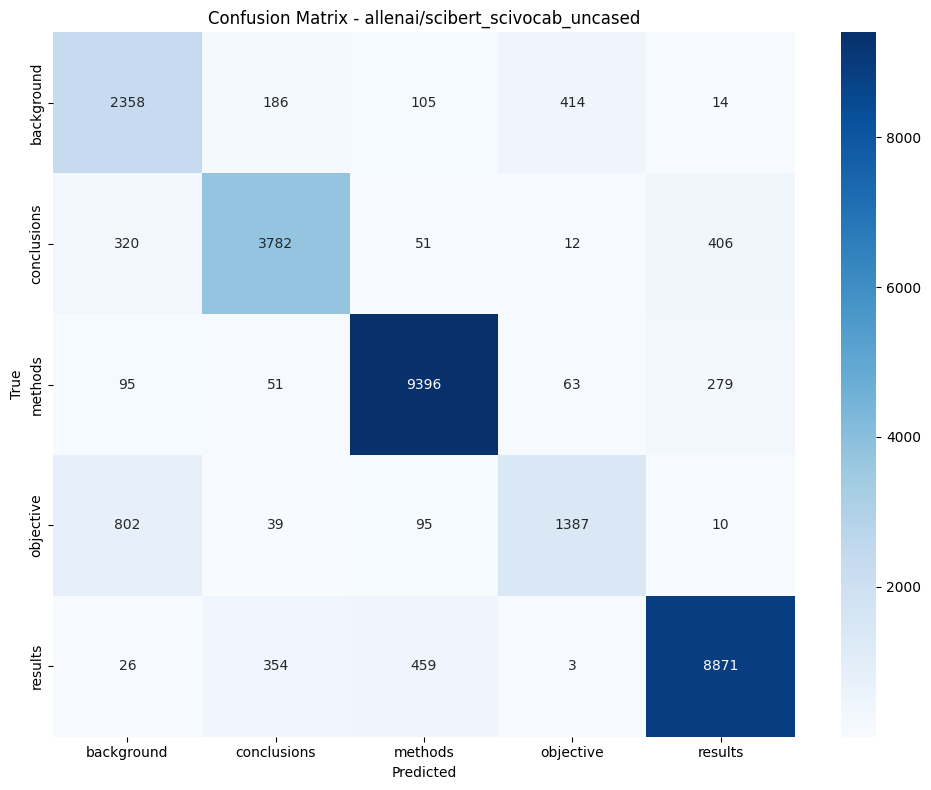

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]


Training completed!
Test Macro F1: 0.8133
Test Micro F1: 0.8721



In [27]:
# Train SciBERT model - Variant 1: Without downsampling (baseline)
print("=" * 80)
print("VARIANT 1: Training without downsampling (Baseline)")
print("=" * 80)

scibert_trainer_baseline, scibert_metrics_baseline = train_model(
    model_name="allenai/scibert_scivocab_uncased",
    learning_rate=2e-5,
    batch_size=32,
    num_epochs=3,
    max_length=128,
    use_downsampling=False
)



VARIANT 2: Training with downsampling

Training: allenai/scibert_scivocab_uncased (with downsampling)
Training samples: 69190



Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: allenai/scibert_scivocab_uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.bias               | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were ne

Starting training...


Epoch,Training Loss,Validation Loss,Macro F1,Micro F1,Precision Background,F1 Background,Precision Conclusions,F1 Conclusions,Precision Methods,F1 Methods,Precision Objective,F1 Objective,Precision Results,F1 Results
1,0.505996,0.369107,0.806908,0.866035,0.619796,0.686203,0.828060,0.828151,0.936136,0.940305,0.707363,0.664584,0.940880,0.915297
2,0.409618,0.371086,0.811758,0.870113,0.642583,0.689994,0.835476,0.843243,0.948495,0.939738,0.672399,0.665249,0.936036,0.920566
3,0.323262,0.396212,0.807650,0.867249,0.626891,0.683261,0.827468,0.834451,0.946508,0.941919,0.675450,0.661079,0.940085,0.917538


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.output.LayerNorm.weight', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.2.attention.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.2.output.LayerNorm.weight', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.3.output.LayerNorm.bias', 'bert.encoder.layer.4.attention.output.La


Evaluating on validation set...



Evaluating on test set...

Generating classification report...

Classification Report:
              precision    recall  f1-score   support

  background     0.6462    0.7225    0.6822      3077
 conclusions     0.8194    0.8464    0.8327      4571
     methods     0.9354    0.9279    0.9316      9884
   objective     0.6541    0.6597    0.6569      2333
     results     0.9330    0.8894    0.9107      9713

    accuracy                         0.8601     29578
   macro avg     0.7976    0.8092    0.8028     29578
weighted avg     0.8644    0.8601    0.8618     29578


Confusion Matrix:
[[2223  187   63  594   10]
 [ 329 3869   34   30  309]
 [ 153   90 9171  179  291]
 [ 701   31   52 1539   10]
 [  34  545  484   11 8639]]


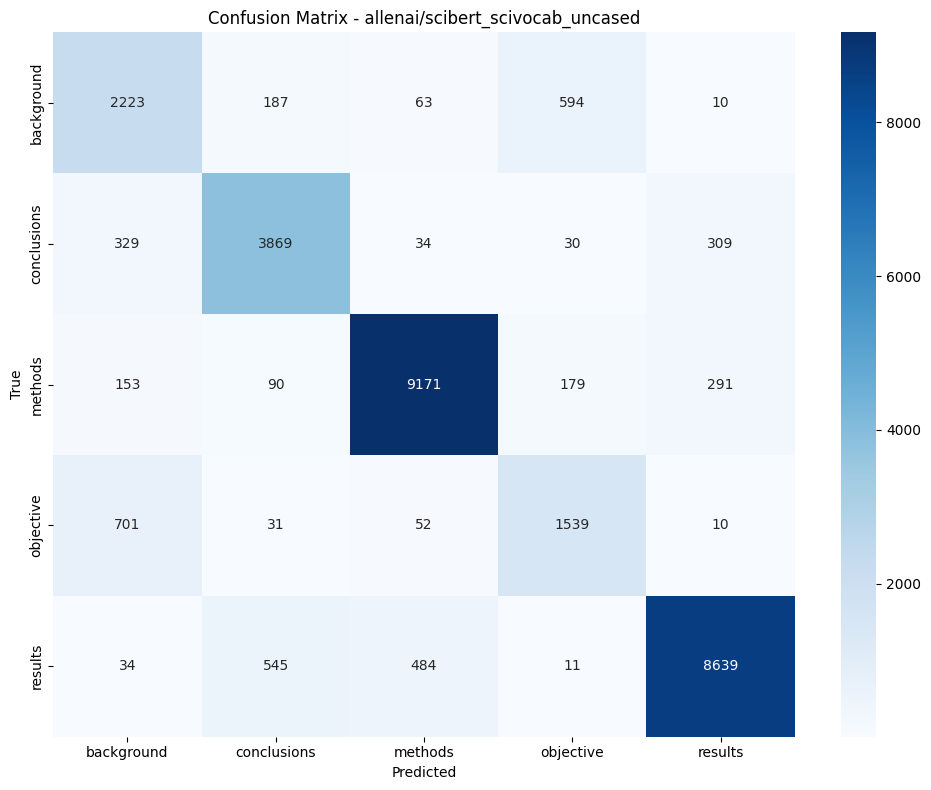

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]


Training completed!
Test Macro F1: 0.8028
Test Micro F1: 0.8601



In [44]:
# Train SciBERT model - Variant 2: With downsampling
print("\n" + "=" * 80)
print("VARIANT 2: Training with downsampling")
print("=" * 80)

scibert_trainer_downsampled, scibert_metrics_downsampled = train_model(
    model_name="allenai/scibert_scivocab_uncased",
    learning_rate=2e-5,
    batch_size=32,
    num_epochs=3,
    max_length=128,
    use_downsampling=True
)



COMPARISON: Baseline vs Downsampled

Overall Performance Comparison:
                   Variant  Macro F1  Micro F1     Loss
Baseline (No Downsampling)  0.813301  0.872067 0.390360
               Downsampled  0.802816  0.860133 0.402251


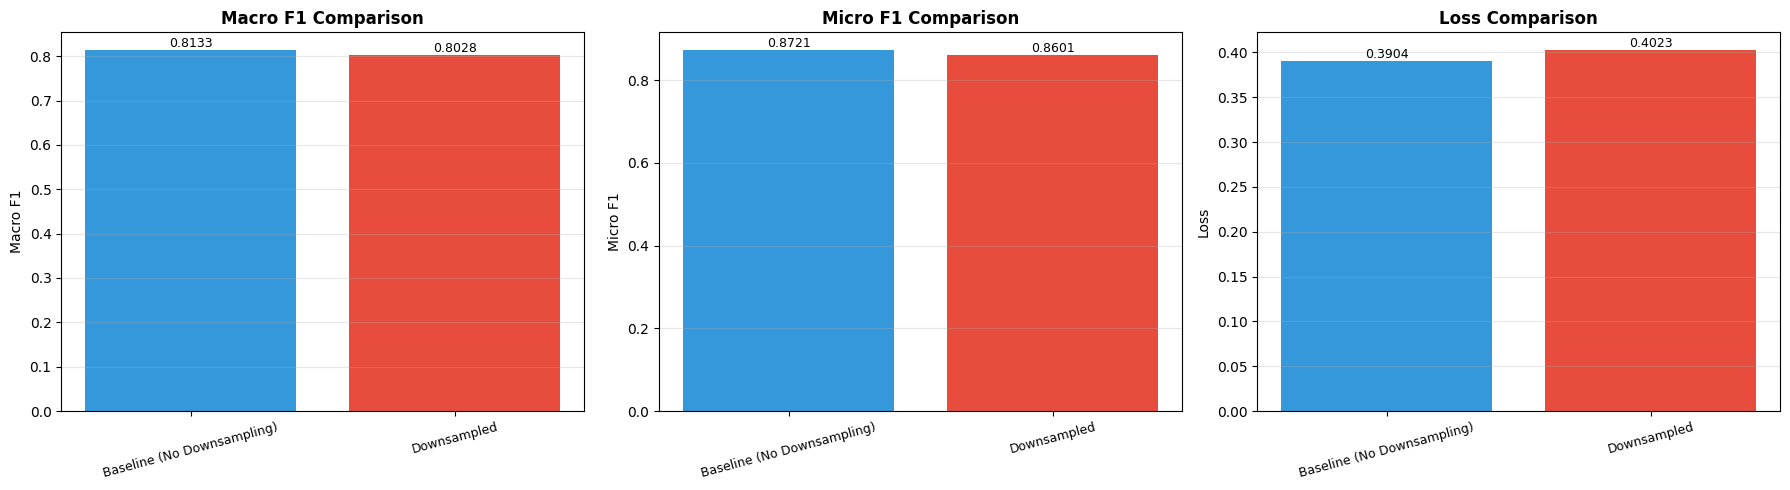


Per-Class F1 Score Comparison:
      Class  Baseline F1  Downsampled F1  Difference
 background     0.706199        0.682216   -0.023984
conclusions     0.842035        0.832670   -0.009365
    methods     0.940070        0.931633   -0.008437
  objective     0.658594        0.656850   -0.001744
    results     0.919608        0.910711   -0.008898


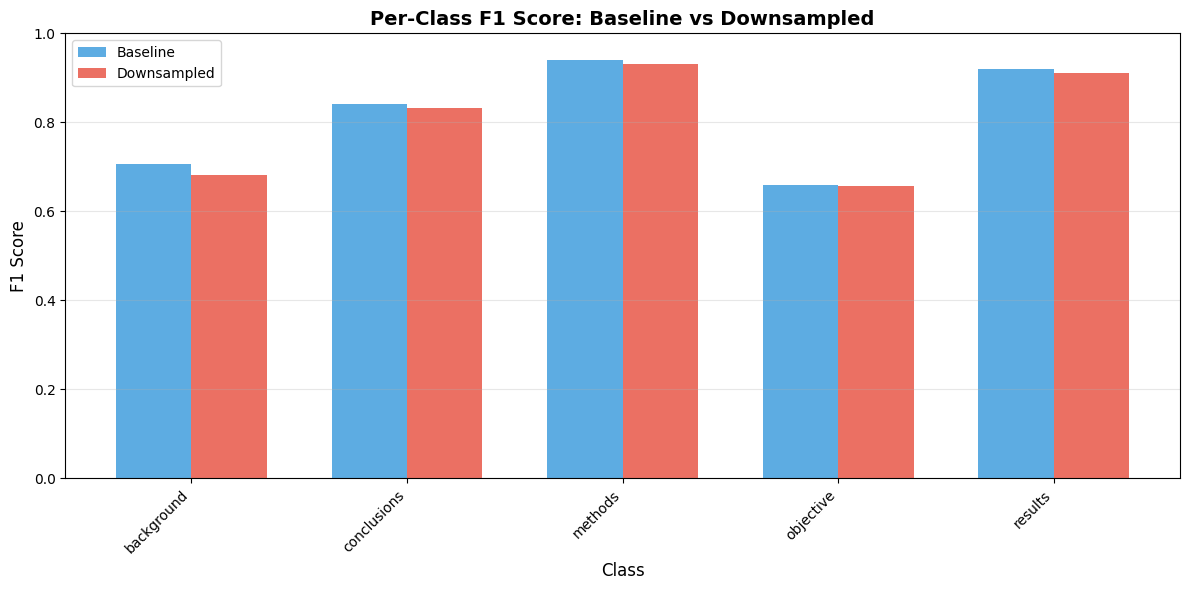

In [45]:
# Compare results between variants
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("COMPARISON: Baseline vs Downsampled")
print("=" * 80)

comparison_data = {
    'Variant': ['Baseline (No Downsampling)', 'Downsampled'],
    'Macro F1': [
        scibert_metrics_baseline['eval_macro_f1'],
        scibert_metrics_downsampled['eval_macro_f1']
    ],
    'Micro F1': [
        scibert_metrics_baseline['eval_micro_f1'],
        scibert_metrics_downsampled['eval_micro_f1']
    ],
    'Loss': [
        scibert_metrics_baseline['eval_loss'],
        scibert_metrics_downsampled['eval_loss']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nOverall Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_to_plot = ['Macro F1', 'Micro F1', 'Loss']
colors = ['#3498db', '#e74c3c']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(comparison_df['Variant'], comparison_df[metric], color=colors)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis='x', rotation=15, labelsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Per-class comparison
class_metrics_baseline = {}
class_metrics_downsampled = {}

for key, value in scibert_metrics_baseline.items():
    if key.startswith('eval_f1_'):
        class_name = key[8:]
        class_metrics_baseline[class_name] = value

for key, value in scibert_metrics_downsampled.items():
    if key.startswith('eval_f1_'):
        class_name = key[8:]
        class_metrics_downsampled[class_name] = value

per_class_data = []
for class_name in sorted(class_metrics_baseline.keys()):
    per_class_data.append({
        'Class': class_name,
        'Baseline F1': class_metrics_baseline[class_name],
        'Downsampled F1': class_metrics_downsampled[class_name],
        'Difference': class_metrics_downsampled[class_name] - class_metrics_baseline[class_name]
    })

per_class_df = pd.DataFrame(per_class_data)
print("\nPer-Class F1 Score Comparison:")
print(per_class_df.to_string(index=False))

# Visualize per-class comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(per_class_df))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], per_class_df['Baseline F1'], 
               width, label='Baseline', color='#3498db', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], per_class_df['Downsampled F1'], 
               width, label='Downsampled', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('Per-Class F1 Score: Baseline vs Downsampled', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(per_class_df['Class'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.0])

plt.tight_layout()
plt.show()
